<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - ATOM</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ATOM.csv')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1822,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1823,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1824,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   ATOM-USD_ADJCLOSE  1139 non-null   float64
 2   ATOM-USD_CLOSE     1139 non-null   float64
 3   ATOM-USD_HIGH      1139 non-null   float64
 4   ATOM-USD_LOW       1139 non-null   float64
 5   ATOM-USD_OPEN      1139 non-null   float64
 6   ATOM-USD_VOLUME    1139 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ATOM-USD_ADJCLOSE,687
ATOM-USD_CLOSE,687
ATOM-USD_HIGH,687
ATOM-USD_LOW,687
ATOM-USD_OPEN,687
ATOM-USD_VOLUME,687


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ATOM-USD_ADJCLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_CLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_HIGH,1139.0,1.277825e+01,1.185602e+01,1.813534e+00,3.964141e+00,5.646225e+00,2.236199e+01,4.469553e+01
ATOM-USD_LOW,1139.0,1.146925e+01,1.060174e+01,1.130963e+00,3.652236e+00,5.195447e+00,1.963870e+01,3.922326e+01
ATOM-USD_OPEN,1139.0,1.213242e+01,1.125074e+01,1.652300e+00,3.792107e+00,5.413434e+00,2.125093e+01,4.427964e+01
ATOM-USD_VOLUME,1139.0,4.468545e+08,5.348951e+08,2.567201e+06,1.373081e+08,2.356630e+08,5.647138e+08,4.260700e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
990,2020-01-11,4.275180,4.275180,4.430325,4.258305,4.264282,134305838.0
513,2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN
789,2019-06-24,6.639572,6.639572,6.823620,6.542251,6.802726,58307067.0
424,2018-06-24,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN
653,2019-02-08,NaN,NaN,NaN,NaN,NaN,NaN
190,2017-11-02,NaN,NaN,NaN,NaN,NaN,NaN
535,2018-10-13,NaN,NaN,NaN,NaN,NaN,NaN
1143,2020-06-12,2.863495,2.863495,2.922755,2.748246,2.774706,124232872.0
461,2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
682,2019-03-09,NaN,NaN,NaN,NaN,NaN,NaN
683,2019-03-10,NaN,NaN,NaN,NaN,NaN,NaN
684,2019-03-11,NaN,NaN,NaN,NaN,NaN,NaN
685,2019-03-12,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0,1.331878,4.500817
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0,11.608961,19.942286
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0,1.680794,24.065681
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0,54.045020,55.617737
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0,5.520165,8.320629


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

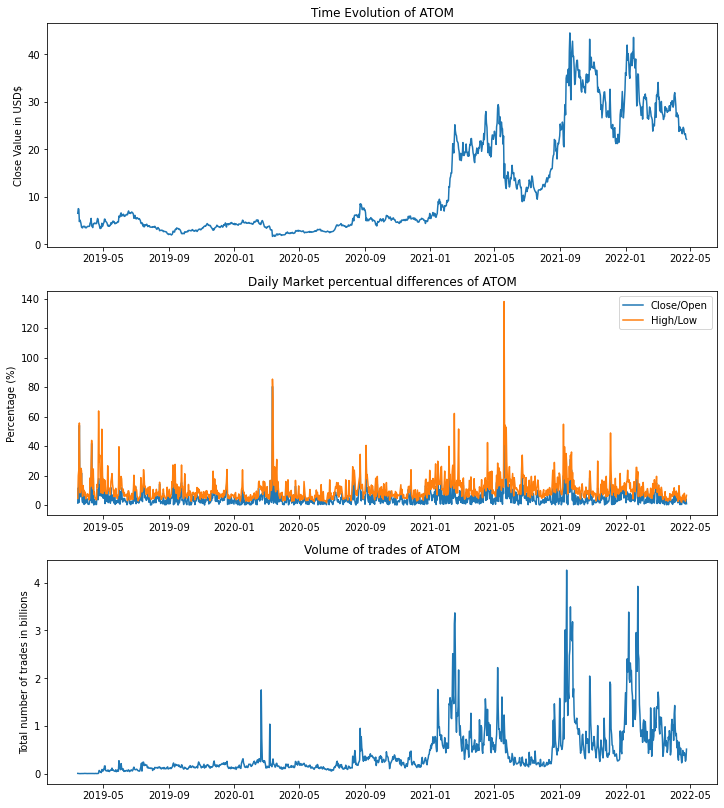

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2020-01-01']
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
293,2020-01-01,4.380158,4.380158,4.467644,4.204366,4.216717,107994513.0,3.731399,6.262014
294,2020-01-02,4.091817,4.091817,4.381319,4.077720,4.379122,111325337.0,7.021450,7.445309
295,2020-01-03,4.247897,4.247897,4.356596,4.015515,4.105868,138617691.0,3.343520,8.494082
296,2020-01-04,4.286356,4.286356,4.385617,4.233593,4.245741,90718305.0,0.947543,3.590893
297,2020-01-05,4.231877,4.231877,4.395146,4.215782,4.284225,115399788.0,1.236996,4.254578
...,...,...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0,4.226664,7.991446
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0,0.934967,3.869160
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0,0.782125,2.572120
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0,4.162394,4.231481


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(30, df)
windowed_df['Date'] = df.iloc[30:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue_11daysBefore,closeValue_12daysBefore,closeValue_13daysBefore,closeValue_14daysBefore,closeValue_15daysBefore,closeValue_16daysBefore,closeValue_17daysBefore,closeValue_18daysBefore,closeValue_19daysBefore,closeValue_20daysBefore,closeValue_21daysBefore,closeValue_22daysBefore,closeValue_23daysBefore,closeValue_24daysBefore,closeValue_25daysBefore,closeValue_26daysBefore,closeValue_27daysBefore,closeValue_28daysBefore,closeValue_29daysBefore,closeValue_30daysBefore,closeValue,Date
0,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.091817,4.380158,4.389513,2020-01-31
1,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.091817,4.376357,2020-02-01
2,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.406765,2020-02-02
3,4.406765,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.260727,2020-02-03
4,4.260727,4.406765,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.216974,2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,28.210022,28.044510,23.305845,2022-04-21
812,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,28.210022,23.089931,2022-04-22
813,23.089931,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,23.271534,2022-04-23
814,23.271534,23.089931,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,22.330360,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((816,), (816, 30, 1), (816,))

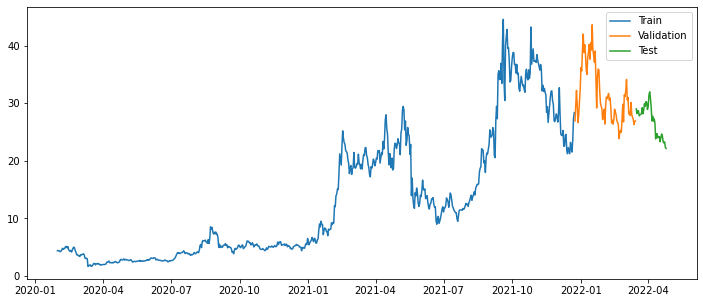

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .85)
q_90 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((30, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [21]:
#BEST SOLUTION OF THE MODEL

# Best MSE=3.813
# Optimal Batch Size: 1000
# Optimal Number of Epochs: 100
# Optimal Value of Learning Rate: 0.045
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error


model = Sequential([layers.Input((30, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.045),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=1000, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 282.2147 - mean_absolute_error: 12.8449 - val_loss: 886.5392 - val_mean_absolute_error: 29.3892 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 230.4851 - mean_absolute_error: 10.7752 - val_loss: 540.8282 - val_mean_absolute_error: 22.7660 - 75ms/epoch - 75ms/step
Epoch 3/100
1/1 - 0s - loss: 132.7140 - mean_absolute_error: 8.6981 - val_loss: 123.9896 - val_mean_absolute_error: 10.0605 - 71ms/epoch - 71ms/step
Epoch 4/100
1/1 - 0s - loss: 186.1485 - mean_absolute_error: 12.1900 - val_loss: 253.9735 - val_mean_absolute_error: 15.1841 - 68ms/epoch - 68ms/step
Epoch 5/100
1/1 - 0s - loss: 116.7475 - mean_absolute_error: 9.6682 - val_loss: 429.8638 - val_mean_absolute_error: 20.1519 - 67ms/epoch - 67ms/step
Epoch 6/100
1/1 - 0s - loss: 108.2959 - mean_absolute_error: 8.0419 - val_loss: 517.1064 - val_mean_absolute_error: 22.2030 - 69ms/epoch - 69ms/step
Epoch 7/100
1/1 - 0s - loss: 122.4923 - mean_absolute_error: 7.4446 - val_loss: 499.5072 - val_mean_absolut

Epoch 57/100
1/1 - 0s - loss: 12.4394 - mean_absolute_error: 2.3000 - val_loss: 39.9753 - val_mean_absolute_error: 4.9826 - 64ms/epoch - 64ms/step
Epoch 58/100
1/1 - 0s - loss: 11.9630 - mean_absolute_error: 2.2381 - val_loss: 37.7925 - val_mean_absolute_error: 4.6990 - 65ms/epoch - 65ms/step
Epoch 59/100
1/1 - 0s - loss: 11.3089 - mean_absolute_error: 2.1384 - val_loss: 34.5371 - val_mean_absolute_error: 4.5770 - 66ms/epoch - 66ms/step
Epoch 60/100
1/1 - 0s - loss: 11.0714 - mean_absolute_error: 2.2740 - val_loss: 30.7382 - val_mean_absolute_error: 4.5719 - 72ms/epoch - 72ms/step
Epoch 61/100
1/1 - 0s - loss: 10.3405 - mean_absolute_error: 2.1254 - val_loss: 27.7257 - val_mean_absolute_error: 4.1224 - 78ms/epoch - 78ms/step
Epoch 62/100
1/1 - 0s - loss: 9.7367 - mean_absolute_error: 2.0096 - val_loss: 25.0161 - val_mean_absolute_error: 4.1452 - 72ms/epoch - 72ms/step
Epoch 63/100
1/1 - 0s - loss: 9.1478 - mean_absolute_error: 2.0084 - val_loss: 24.1343 - val_mean_absolute_error: 4.258

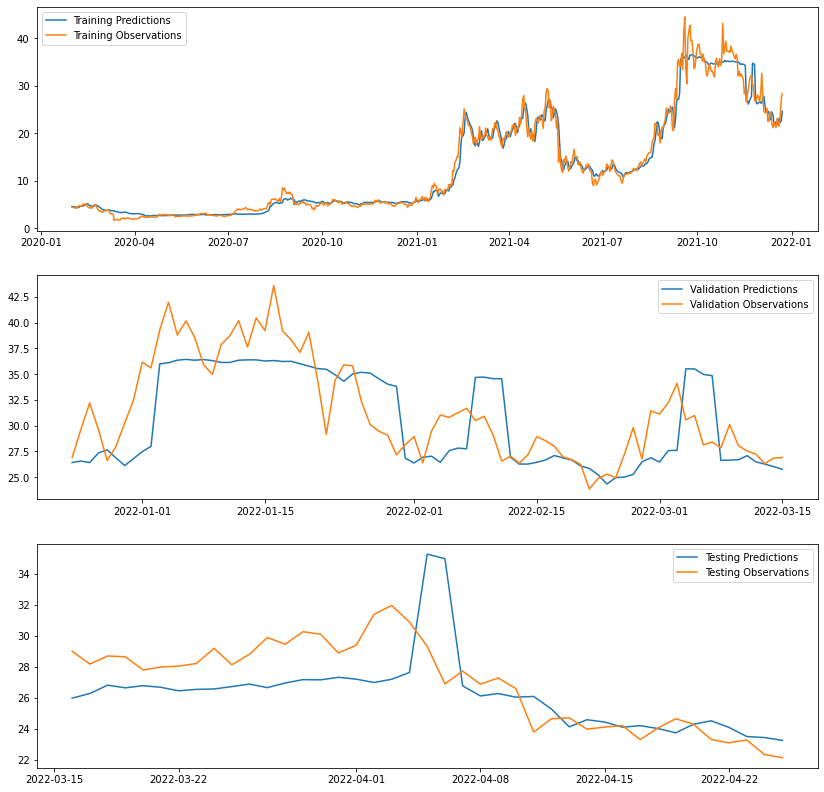

In [22]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [23]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

extra_dates = np.array(['2022-05-09', '2022-05-10', '2022-05-11'])
recursive_dates = np.append(recursive_dates,extra_dates)

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

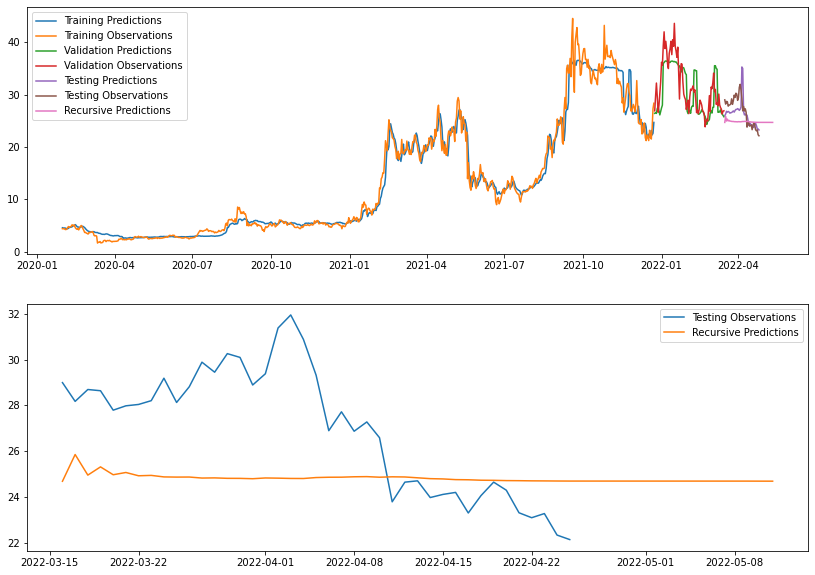

In [24]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
              'Training Observations',
              'Validation Predictions', 
              'Validation Observations',
              'Testing Predictions', 
              'Testing Observations',
              'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

In [25]:
may_10_prediction = coin_name +'-USD',recursive_predictions[-2][0]
may_10_prediction

('ATOM-USD', 24.689552)